# Test the output of `https://github.com/ACCESS-NRI/ocean_model_grid_generator`

My Folder: `/home/156/cy8964/model-tools/grid-tools/ocean_model_grid_generator2`

Data: `/scratch/x77/cy8964/grids/`

Goal: Compare 1/20th degree and 1/20th degree with displaced pole grid sizes

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from dask.distributed import Client
import cartopy.crs as ccrs
import cmocean.cm as cmo
import matplotlib.path as mpath


In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: /proxy/8787/status,
Dashboard: /proxy/8787/status,Workers: 7
Total threads: 14,Total memory: 63.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:33729,Workers: 7
Dashboard: /proxy/8787/status,Total threads: 14
Started: Just now,Total memory: 63.00 GiB
Comm: tcp://127.0.0.1:36729,Total threads: 2
Dashboard: /proxy/38561/status,Memory: 9.00 GiB
Nanny: tcp://127.0.0.1:36085,


In [4]:
ocean_grid005 = xr.open_dataset('/scratch/x77/cy8964/grids/ocean_hgrid_005.nc')
ocean_grid005_dsp = xr.open_dataset('/scratch/x77/cy8964/grids/ocean_hgrid_005_dsp.nc')
ocean_grid025 = xr.open_dataset('/scratch/x77/cy8964/grids/ocean_hgrid_025_dsp.nc')


In [4]:
ocean_grid01 = xr.open_dataset('/scratch/x77/cy8964/grids/ocean_hgrid_01.nc')
ocean_grid008 = xr.open_dataset('/scratch/x77/cy8964/grids/ocean_hgrid_008.nc')


In [19]:
ocean_grid01.sel(nyp = slice(0,2500),ny = slice(0,2500))#.y.max().values

<xarray.Dataset> Size: 864MB
Dimensions:   (nyp: 2500, nxp: 7201, ny: 2500, nx: 7200)
Dimensions without coordinates: nyp, nxp, ny, nx
Data variables:
    tile      |S255 255B ...
    y         (nyp, nxp) float64 144MB -86.0 -86.0 -86.0 ... -31.91 -31.91
    x         (nyp, nxp) float64 144MB ...
    dy        (ny, nxp) float64 144MB ...
    dx        (nyp, nx) float64 144MB ...
    area      (ny, nx) float64 144MB ...
    angle_dx  (nyp, nxp) float64 144MB ...
Attributes:
    history:      This grid file was generated via command ocean_grid_generat...
    description:  This is an orthogonal coordinate grid for the Earth with a ...
    source:       ocean_grid_generator.py had git hash 869c6153fb373bc69b338c...

In [47]:
ocean_grid01.x.isel(nyp = 0).values

array([-280.  , -279.95, -279.9 , ...,   79.9 ,   79.95,   80.  ])

In [20]:
ocean_grid008.sel(nyp = slice(0,3000),ny = slice(0,3000))#.y.max().values

<xarray.Dataset> Size: 1GB
Dimensions:   (nyp: 3000, nxp: 8641, ny: 3000, nx: 8640)
Dimensions without coordinates: nyp, nxp, ny, nx
Data variables:
    tile      |S255 255B ...
    y         (nyp, nxp) float64 207MB ...
    x         (nyp, nxp) float64 207MB ...
    dy        (ny, nxp) float64 207MB ...
    dx        (nyp, nx) float64 207MB ...
    area      (ny, nx) float64 207MB ...
    angle_dx  (nyp, nxp) float64 207MB ...
Attributes:
    history:      This grid file was generated via command ocean_grid_generat...
    description:  This is an orthogonal coordinate grid for the Earth with a ...
    source:       ocean_grid_generator.py had git hash 869c6153fb373bc69b338c...

In [30]:
ocean_grid005

<xarray.Dataset> Size: 8GB
Dimensions:   (nyp: 12201, nxp: 14401, ny: 12200, nx: 14400)
Dimensions without coordinates: nyp, nxp, ny, nx
Data variables:
    tile      |S255 255B ...
    y         (nyp, nxp) float64 1GB ...
    x         (nyp, nxp) float64 1GB ...
    dy        (ny, nxp) float64 1GB ...
    dx        (nyp, nx) float64 1GB ...
    area      (ny, nx) float64 1GB ...
    angle_dx  (nyp, nxp) float64 1GB ...
Attributes:
    history:      This grid file was generated via command ocean_grid_generat...
    description:  This is an orthogonal coordinate grid for the Earth with a ...
    source:       ocean_grid_generator.py had git hash 869c6153fb373bc69b338c...

In [44]:
ocean_grid005.x.isel(nyp = 0)

<xarray.DataArray 'x' (nxp: 14401)> Size: 115kB
[14401 values with dtype=float64]
Dimensions without coordinates: nxp
Attributes:
    units:    degrees

In [45]:
360*20

7200

### 1/12th model has 6/5 x 12/10 more grid cells than 1/10th from -86 to -30S = 144% more cells

(-90.0, -37.0)

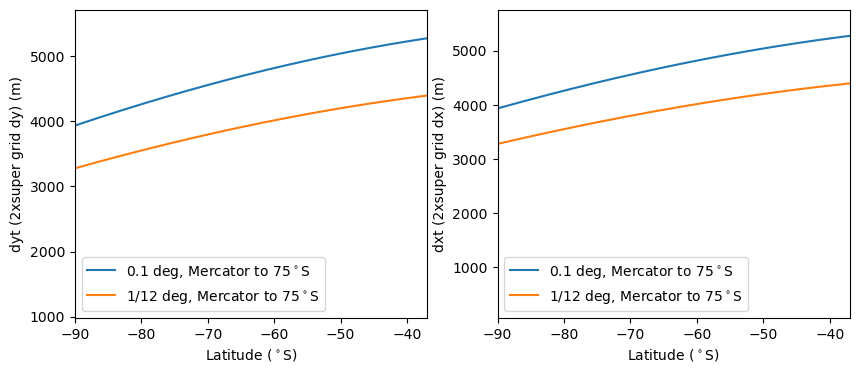

In [48]:
fig, axes = plt.subplots(ncols = 2, figsize= (10,4))

axes[0].plot(ocean_grid01.sel(nyp = slice(0,3000)).y.isel(nxp = 0)*2,
         ocean_grid01.sel(ny = slice(0,3000)).dy.isel(nxp = 0),
        label = '0.1 deg, Mercator to 75$^\circ$S')
axes[0].plot(ocean_grid008.sel(nyp = slice(0,3600)).y.isel(nxp = 0)*2,
         ocean_grid008.sel(ny = slice(0,3600)).dy.isel(nxp = 0),
        label = '1/12 deg, Mercator to 75$^\circ$S')

axes[0].legend()
axes[0].set_ylabel('dyt (2xsuper grid dy) (m)')
axes[0].set_xlabel('Latitude ($^\circ$S)')
axes[0].set_xlim(-90,-37)


axes[1].plot(ocean_grid01.sel(nyp = slice(0,3000)).y.isel(nxp = 0)*2,
         ocean_grid01.sel(nyp = slice(0,3000)).dx.isel(nx = 0),
        label = '0.1 deg, Mercator to 75$^\circ$S')
axes[1].plot(ocean_grid008.sel(nyp = slice(0,3600)).y.isel(nxp = 0)*2,
         ocean_grid008.sel(nyp = slice(0,3600)).dx.isel(nx = 0),
        label = '1/12 deg, Mercator to 75$^\circ$S')

axes[1].legend()
axes[1].set_ylabel('dxt (2xsuper grid dx) (m)')
axes[1].set_xlabel('Latitude ($^\circ$S)')
axes[1].set_xlim(-90,-37)


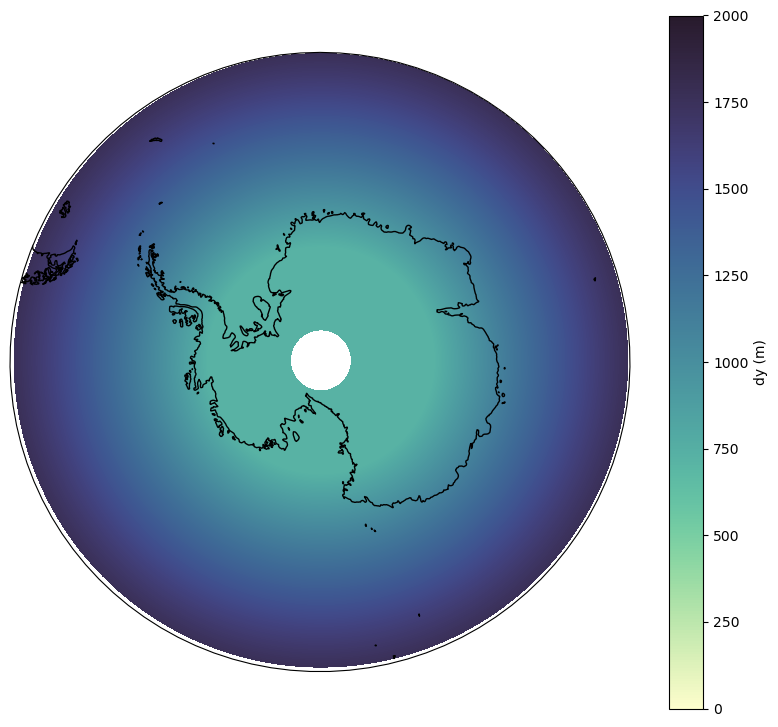

In [8]:
projection = ccrs.SouthPolarStereo()

plt.figure(figsize=(10, 9))
ax = plt.axes(projection=projection)

ax.set_extent([-280, 80, -80, -50], crs=ccrs.PlateCarree())
ax.coastlines(resolution="50m")

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.


theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# ocean_grid005.plot(
#     x="x",
#     y="y",
#     transform=ccrs.PlateCarree(),
#     vmin=-2,
#     vmax=30,
#     extend="both",
#     cmap=cm.cm.thermal,
#     cbar_kwargs={"label": "SST (°C)", "fraction": 0.03, "aspect": 15, "shrink": 0.7},
# );

plt.pcolormesh(ocean_grid005.x.sel(nyp = slice(0,4000)),
               ocean_grid005.y.sel(nyp = slice(0,4000)),
               ocean_grid005.dy.sel(ny = slice(0,4000)),
               transform=ccrs.PlateCarree(), vmin = 0, vmax = 2000, cmap = cmo.deep)
plt.colorbar(label = 'dy (m)')

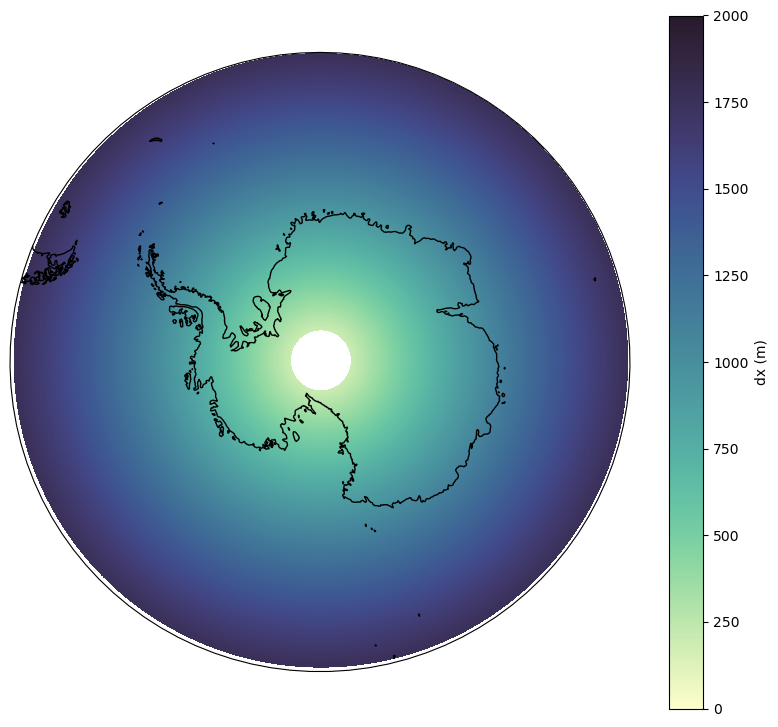

In [6]:
projection = ccrs.SouthPolarStereo()

plt.figure(figsize=(10, 9))
ax = plt.axes(projection=projection)

ax.set_extent([-280, 80, -80, -50], crs=ccrs.PlateCarree())
ax.coastlines(resolution="50m")

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.

theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# ocean_grid005.plot(
#     x="x",
#     y="y",
#     transform=ccrs.PlateCarree(),
#     vmin=-2,
#     vmax=30,
#     extend="both",
#     cmap=cm.cm.thermal,
#     cbar_kwargs={"label": "SST (°C)", "fraction": 0.03, "aspect": 15, "shrink": 0.7},
# );

plt.pcolormesh(ocean_grid005.x.sel(nyp = slice(0,4000)),
               ocean_grid005.y.sel(nyp = slice(0,4000)),
               ocean_grid005.dx.sel(nyp = slice(0,4000)),
               transform=ccrs.PlateCarree(), vmin = 0, vmax = 2000, cmap = cmo.deep)
plt.colorbar(label = 'dx (m)')

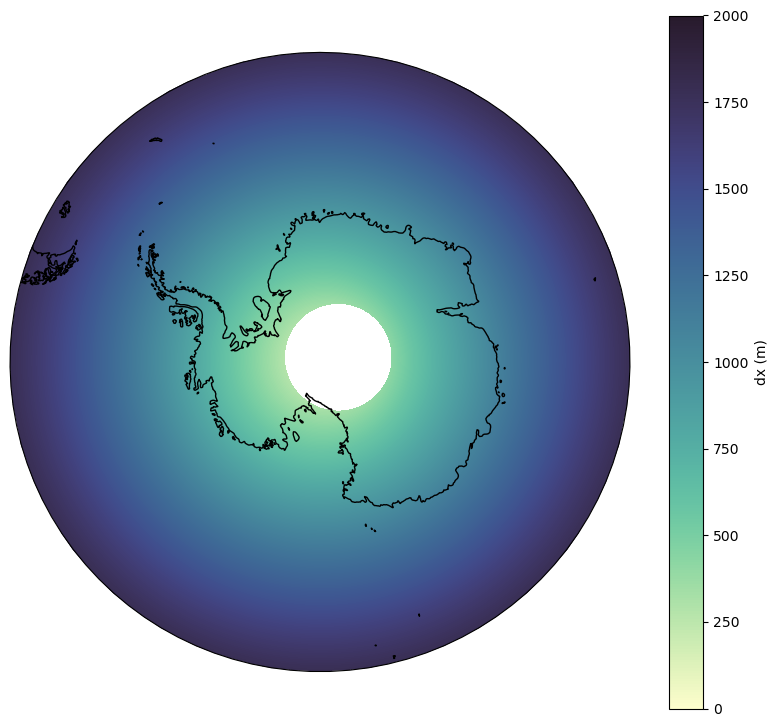

In [5]:
projection = ccrs.SouthPolarStereo()

plt.figure(figsize=(10, 9))
ax = plt.axes(projection=projection)

ax.set_extent([-280, 80, -80, -50], crs=ccrs.PlateCarree())
ax.coastlines(resolution="50m")

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.

theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# ocean_grid005.plot(
#     x="x",
#     y="y",
#     transform=ccrs.PlateCarree(),
#     vmin=-2,
#     vmax=30,
#     extend="both",
#     cmap=cm.cm.thermal,
#     cbar_kwargs={"label": "SST (°C)", "fraction": 0.03, "aspect": 15, "shrink": 0.7},
# );

plt.pcolormesh(ocean_grid005_dsp.x.sel(nyp = slice(0,4000)),
               ocean_grid005_dsp.y.sel(nyp = slice(0,4000)),
               ocean_grid005_dsp.dx.sel(nyp = slice(0,4000)),
               transform=ccrs.PlateCarree(), vmin = 0, vmax = 2000, cmap = cmo.deep)
plt.colorbar(label = 'dx (m)')

### dx is limiting dimension, by shifting South Pole I'm guessing the smallest ocean cells (back of Ross ice shelf) will double in size

#### Also, I think these are all super grids (u and t points all included?) b.c. seem to be double the resolution I inputted.

#### can be done easily with same tool!

In [23]:
print(ocean_grid005.dx.sel(nyp = slice(0,4000)).min().values)

193.9141495238508


In [67]:
# compare theoretical:

lat = -82
R_E = 6378e3 #m

dx = 2*np.pi*R_E*np.abs(np.cos(lat*np.pi/180))/(360*4)
print(dx)

3873.0864885110045


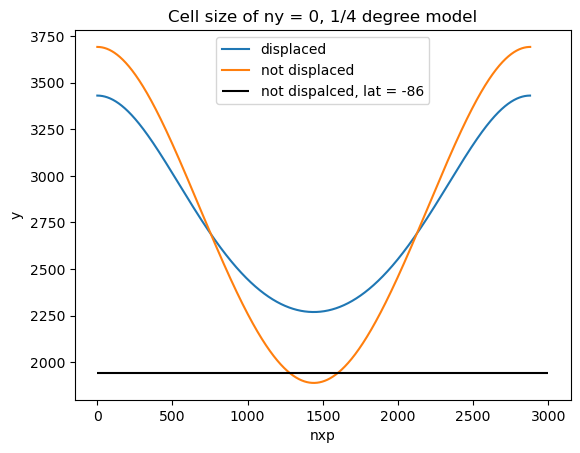

In [80]:
(ocean_grid025.dx.isel(nyp = 0)*2).plot(label = 'displaced')
(2*np.pi*R_E*np.abs(np.cos((ocean_grid025.y.isel(nyp = 0))*np.pi/180))/(360*4)).plot(label = 'not displaced')
plt.hlines(2*np.pi*R_E*np.abs(np.cos(-86*np.pi/180)/(360*4)),0,3000,color = 'k',label = 'not dispalced, lat = -86')
plt.title('Cell size of ny = 0, 1/4 degree model')
plt.legend()

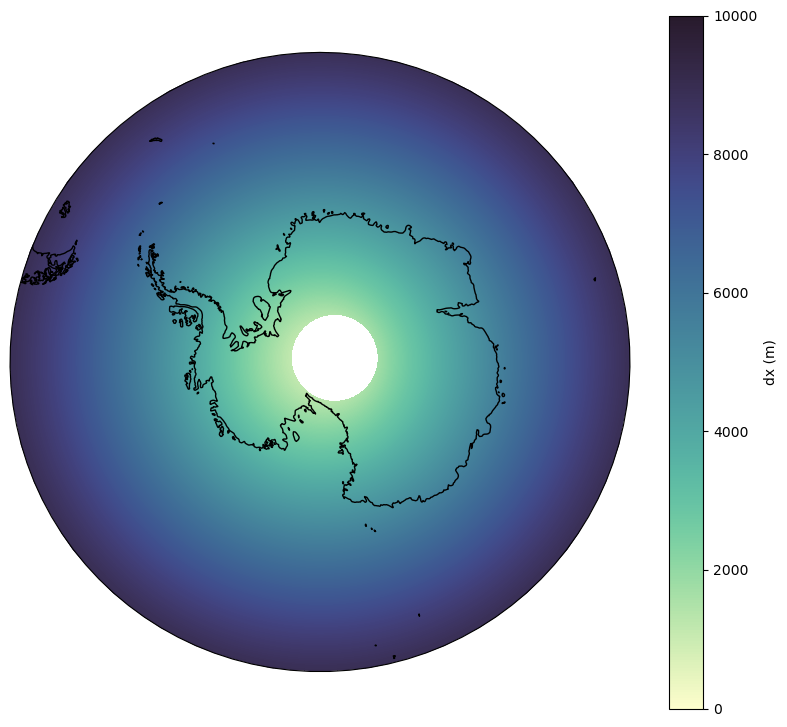

In [79]:
projection = ccrs.SouthPolarStereo()

plt.figure(figsize=(10, 9))
ax = plt.axes(projection=projection)

ax.set_extent([-280, 80, -80, -50], crs=ccrs.PlateCarree())
ax.coastlines(resolution="50m")

# Compute a circle in axes coordinates, which we can use as a boundary
# for the map. We can pan/zoom as much as we like - the boundary will be
# permanently circular.

theta = np.linspace(0, 2 * np.pi, 100)
center, radius = [0.5, 0.5], 0.5
verts = np.vstack([np.sin(theta), np.cos(theta)]).T
circle = mpath.Path(verts * radius + center)
ax.set_boundary(circle, transform=ax.transAxes)

# ocean_grid005.plot(
#     x="x",
#     y="y",
#     transform=ccrs.PlateCarree(),
#     vmin=-2,
#     vmax=30,
#     extend="both",
#     cmap=cm.cm.thermal,
#     cbar_kwargs={"label": "SST (°C)", "fraction": 0.03, "aspect": 15, "shrink": 0.7},
# );

plt.pcolormesh(ocean_grid025.x.sel(nyp = slice(0,2000)),
               ocean_grid025.y.sel(nyp = slice(0,2000)),
               ocean_grid025.dx.sel(nyp = slice(0,2000)),
               transform=ccrs.PlateCarree(), vmin = 0, vmax = 10000, cmap = cmo.deep)
plt.colorbar(label = 'dx (m)')